In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))




Saving OSA_extreme_both.xlsx to OSA_extreme_both.xlsx
User uploaded file "OSA_extreme_both.xlsx" with length 26018 bytes


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = pd.read_excel("OSA_extreme_both.xlsx")
data.OSA = data.OSA.astype("category").cat.codes
X=data[['Gender','BMI','Age','Cervical']]
y=data[['IAH']]
X_features = X.columns

scalerX = StandardScaler()
scalerX.fit(X)
X = pd.DataFrame(scalerX.transform(X))

X=X.values
y = y.values
print(X[0:5])
print(y[0:5])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


[[ 0.68278267 -0.14658954 -0.74133036  0.2257535 ]
 [ 0.68278267 -0.54101462 -1.32278175 -0.09790431]
 [ 0.68278267  0.04704734 -1.32278175  0.38419391]
 [ 0.68278267  0.03297123 -0.74133036  0.38419391]
 [ 0.68278267  3.24186572 -0.07681449  0.86629213]]
[[71.]
 [ 9.]
 [ 2.]
 [34.]
 [60.]]


Kernel: linear Mean MSE: 19.446 (2.729)
Kernel: poly Mean MSE: 23.159 (4.887)
Kernel: rbf Mean MSE: 20.192 (3.534)


No handles with labels found to put in legend.


Kernel: sigmoid Mean MSE: 19.876 (3.033)
C: 0.010 Mean MSE: 24.682 (4.457)
Kernel: sigmoid Mean MSE: 24.682 (4.457)
C: 0.100 Mean MSE: 19.937 (3.164)
Kernel: sigmoid Mean MSE: 19.937 (3.164)
C: 1.000 Mean MSE: 19.446 (2.729)
Kernel: sigmoid Mean MSE: 19.446 (2.729)
C: 10.000 Mean MSE: 19.430 (2.683)
Kernel: sigmoid Mean MSE: 19.430 (2.683)
C: 100.000 Mean MSE: 19.431 (2.676)
Kernel: sigmoid Mean MSE: 19.431 (2.676)


No handles with labels found to put in legend.


C: 1000.000 Mean MSE: 19.434 (2.676)
Kernel: sigmoid Mean MSE: 19.434 (2.676)


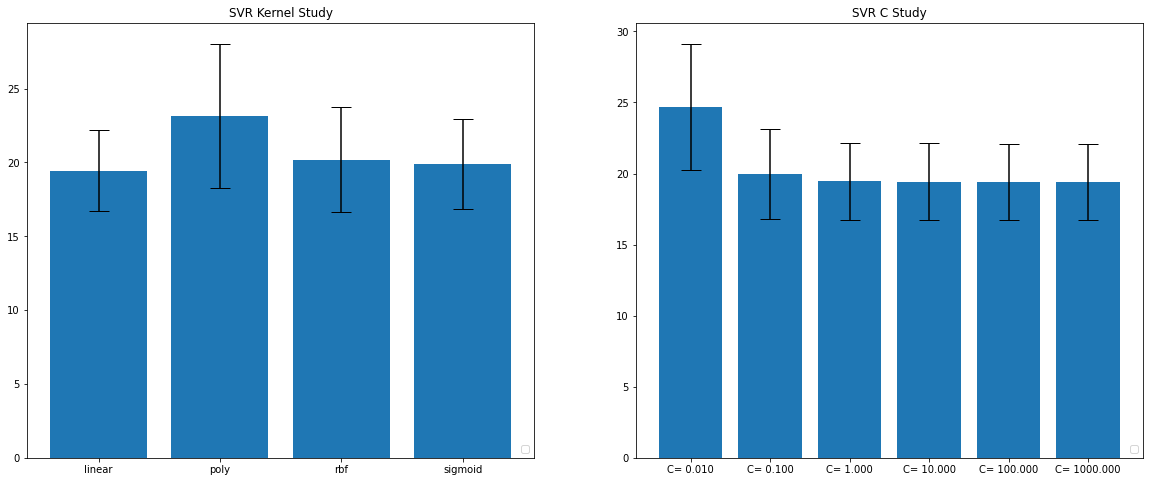

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from numpy import absolute
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVR

scoring = 'neg_root_mean_squared_error'
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
MSEk= []
error1=[]
x_pos = np.arange(len(kernels))

plt.figure(figsize=(20, 8))
ax1 = plt.subplot(121)
for kernel in kernels:
  clf = SVR(kernel=kernel,gamma='auto')
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  _scores = cross_validate(clf, X, y.ravel(), cv=cv,scoring=scoring)
  scores.append(_scores)
  error1.append(std(_scores['test_score']))
  MSEk.append(absolute(mean(_scores['test_score'])))
  print('Kernel: %s Mean MSE: %.3f (%.3f)' % (kernel,absolute(mean(_scores['test_score'])), std(_scores['test_score'])))
ax1.bar(x_pos, MSEk,yerr=error1,ecolor='black',capsize=10)
ax1.set_xticks(np.arange(len(kernels)))
ax1.set_xticklabels(kernels)
ax1.set_title('SVR Kernel Study')
ax1.legend(loc="lower right")

ax2 = plt.subplot(122)
MSEc= []
error2=[]
cs = [0.01,0.1,1,10,100,1000]
_cs = []
x_pos2 = np.arange(len(cs))

for c in cs:
  clf = SVR(C=c,kernel='linear',gamma='auto')
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  _scores = cross_validate(clf, X, y.ravel(), cv=cv,scoring=scoring)
  scores.append(_scores)
  print('C: %.3f Mean MSE: %.3f (%.3f)' % (c,absolute(mean(_scores['test_score'])), std(_scores['test_score'])))
  scores.append(_scores)
  error2.append(std(_scores['test_score']))
  MSEc.append(absolute(mean(_scores['test_score'])))
  print('Kernel: %s Mean MSE: %.3f (%.3f)' % (kernel,absolute(mean(_scores['test_score'])), std(_scores['test_score'])))
  _cs.append("C= %.3f"%c)
ax2.bar(x_pos2, MSEc,yerr=error2,ecolor='black',capsize=10)
ax2.set_xticks(np.arange(len(_cs)))
ax2.set_xticklabels(_cs)
ax2.set_title('SVR C Study')
ax2.legend(loc="lower right")

plt.show()


In [ ]:
print(scores)

{'fit_time': array([0.00786328, 0.0082109 , 0.00769281, 0.01217794, 0.01034331,
       0.00725675, 0.01019025, 0.00787687, 0.00759721, 0.00768566,
       0.00894904, 0.00984979, 0.00711536, 0.0071516 , 0.00985432,
       0.00900221, 0.00764108, 0.00698495, 0.00778651, 0.00798512,
       0.00744653, 0.00690675, 0.01220345, 0.00827718, 0.00828815,
       0.00677061, 0.00690556, 0.00716424, 0.00802326, 0.00686502]), 'score_time': array([0.00056243, 0.00051737, 0.00053167, 0.00054312, 0.00061631,
       0.00051522, 0.00049448, 0.00057817, 0.00050855, 0.00052381,
       0.00050759, 0.00054574, 0.00057173, 0.00055289, 0.00047374,
       0.00052381, 0.00050783, 0.00049949, 0.00048018, 0.00049949,
       0.00047112, 0.00046515, 0.00050688, 0.00046349, 0.00046515,
       0.00048614, 0.000458  , 0.00047922, 0.00045919, 0.0004878 ]), 'test_score': array([-23.93644535, -17.65800111, -20.22973372, -20.00848184,
       -17.68915523, -20.5598333 , -17.76704877, -14.31035706,
       -21.56621042, -20.